## ELECTRIC CAR SALES

09:04:2023

#### Hemant Thapa

Electric cars have become increasingly popular in recent years due to their numerous benefits over traditional gasoline vehicles. One of the biggest benefits is their low operating costs, as electricity is much cheaper than gasoline and EVs have fewer moving parts that require maintenance. Additionally, electric cars emit no tailpipe pollutants, making them a much cleaner and environmentally-friendly mode of transportation.

Another advantage of electric cars is their performance. Many electric cars have instant torque, meaning that they have strong acceleration right from the start. This is because electric motors deliver maximum torque from a standstill, while internal combustion engines require time to build up power. Additionally, electric cars are often much quieter than gasoline cars, as they produce very little noise.

There are also various charging options available for electric cars, including fast charging networks, home charging stations, and public charging stations. This means that drivers can easily recharge their cars at convenient locations, whether they're at home, work, or on the road.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import datetime
import time

#### DESIGNING LINEAR REGRESSION MODEL

In [2]:
class LineModel:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.b1, self.bo = self.LinearRegression()

    def LinearRegression(self):
        x_mean = self.x.mean()
        y_mean = self.y.mean()
        x_value = self.x - x_mean
        y_value = self.y - y_mean
        x_value_square = np.square(x_value)
        x_value_square_total = x_value_square.sum()
        x_y_value_square = np.multiply(x_value, y_value)
        x_y_value_square_total = x_y_value_square.sum()
        b1 = x_y_value_square_total / x_value_square_total
        bo = y_mean - (b1 * x_mean)
        return b1, bo

    def predict(self, x_test):
        y_pred = self.b1 * x_test + self.bo
        return y_pred


#### DESIGNING TRAIN TEST AND SPLIT

In [3]:
class TrainTestSplit:
    def __init__(self, X, y, test_size=0.2):
        self.X = X
        self.y = y
        self.test_size = test_size

    def split(self):
        np.random.seed(0)
        indices = np.random.permutation(self.X.shape[0])
        split = int(self.X.shape[0] * (1-self.test_size))
        train_indices = indices[:split]
        test_indices = indices[split:]
        X_train, y_train = self.X[train_indices], self.y[train_indices]
        X_test, y_test = self.X[test_indices], self.y[test_indices]
        return X_train, X_test, y_train, y_test

#### CLASS STOCK

In [4]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    def Price(self, ticker):
        stock = yf.Ticker(self.ticker).history(period="max")
        return stock

In this report we will check top selling one year electric car chart and perform trend analysis.

In [5]:
days = 365 #365days

In [189]:
#from yahoo finance Api, we only able to mine these data
tesla_stock = Stock("TSLA").Price("TSLA").tail(days)
general_motor_stock = Stock("GM").Price("GM").tail(days)
ford_stock = Stock("F").Price("F").tail(days)

In [7]:
snp500 = Stock("^GSPC").Price("^GSPC").tail(days)

In [214]:
top500 = pd.read_excel("snp500.xlsx")
top500[:5]

,serial_number,company,ticker,weight,price,change,percent change
0,1,Apple Inc.,AAPL,7.136544,164.55,-0.11,(-0.07%)
1,2,Microsoft Corporation,MSFT,6.325500,291.72,0.12,-0.0004
2,3,Amazon.com Inc.,AMZN,2.651518,101.91,-0.15,(-0.15%)
3,4,NVIDIA Corporation,NVDA,1.938229,270.58,0.21,-0.0008
4,5,Alphabet Inc. Class A,GOOGL,1.881812,108.28,-0.14,(-0.13%)


In [219]:
sorted_companies = top500.company.unique()
sorted_companies.sort()
sorted_companies[:25]

array(['3M Company', 'A. O. Smith Corporation', 'AES Corporation',
       'AMETEK Inc.', 'ANSYS Inc.', 'APA Corporation', 'AT&T Inc.',
       'AbbVie Inc.', 'Abbott Laboratories', 'Accenture Plc Class A',
       'Activision Blizzard Inc.', 'Adobe Incorporated',
       'Advance Auto Parts Inc.', 'Advanced Micro Devices Inc.',
       'Aflac Incorporated', 'Agilent Technologies Inc.',
       'Air Products and Chemicals Inc.', 'Akamai Technologies Inc.',
       'Alaska Air Group Inc.', 'Albemarle Corporation',
       'Alexandria Real Estate Equities Inc.', 'Align Technology Inc.',
       'Allegion Public Limited Company', 'Alliant Energy Corp',
       'Allstate Corporation'], dtype=object)

#### 1. LOADING DATASET

In [8]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

#### 2. CHECKING NULL VALUES

In [9]:
df.isnull().sum()

VIN (1-10)                                              0
County                                                  0
City                                                    0
State                                                   0
Postal Code                                             0
Model Year                                              0
Make                                                    0
Model                                                   4
Electric Vehicle Type                                   0
Clean Alternative Fuel Vehicle (CAFV) Eligibility       0
Electric Range                                          0
Base MSRP                                               0
Legislative District                                  284
DOL Vehicle ID                                          0
Vehicle Location                                     3508
Electric Utility                                      431
2020 Census Tract                                       0
dtype: int64

#### 3. CONVERTING COLUMNS TO SNAKE CASE

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

In [11]:
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [12]:
df.isnull().sum()

vin_(1-10)                                              0
county                                                  0
city                                                    0
state                                                   0
postal_code                                             0
model_year                                              0
make                                                    0
model                                                   4
electric_vehicle_type                                   0
clean_alternative_fuel_vehicle_(cafv)_eligibility       0
electric_range                                          0
base_msrp                                               0
legislative_district                                  284
dol_vehicle_id                                          0
vehicle_location                                     3508
electric_utility                                      431
2020_census_tract                                       0
dtype: int64

In [13]:
df['vin_(1-10)'].unique()

array(['1N4BZ0CP9G', '1N4AZ0CP5G', '1N4BZ1CP7K', ..., 'YV4102CK7K',
       'WA1LABGE5M', 'YV4BR0CL8L'], dtype=object)

In [14]:
# Drop the "electric_utility" column
df = df.drop(columns=['vin_(1-10)'])

In [15]:
df = df.rename(columns={"clean_alternative_fuel_vehicle_(cafv)_eligibility":"clean_alternative_fuel_vehicle"})

In [16]:
df[:5]

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,Snohomish,Arlington,WA,98223,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,39.0,238236288,NaN,PUGET SOUND ENERGY INC,53061052701
1,King,Seattle,WA,98118,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,37.0,182735367,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033011102
2,Thurston,Olympia,WA,98502,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,22.0,142814556,POINT (-102.71236 22.94812),NaN,53067012002
3,Frederick,Frederick,MD,21704,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,114252337,POINT (-77.368491 39.354463),NaN,24021752205
4,King,Bellevue,WA,98008,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,48.0,2075510,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023100


#### 4. VISUALISATION OF MISSING VALUES

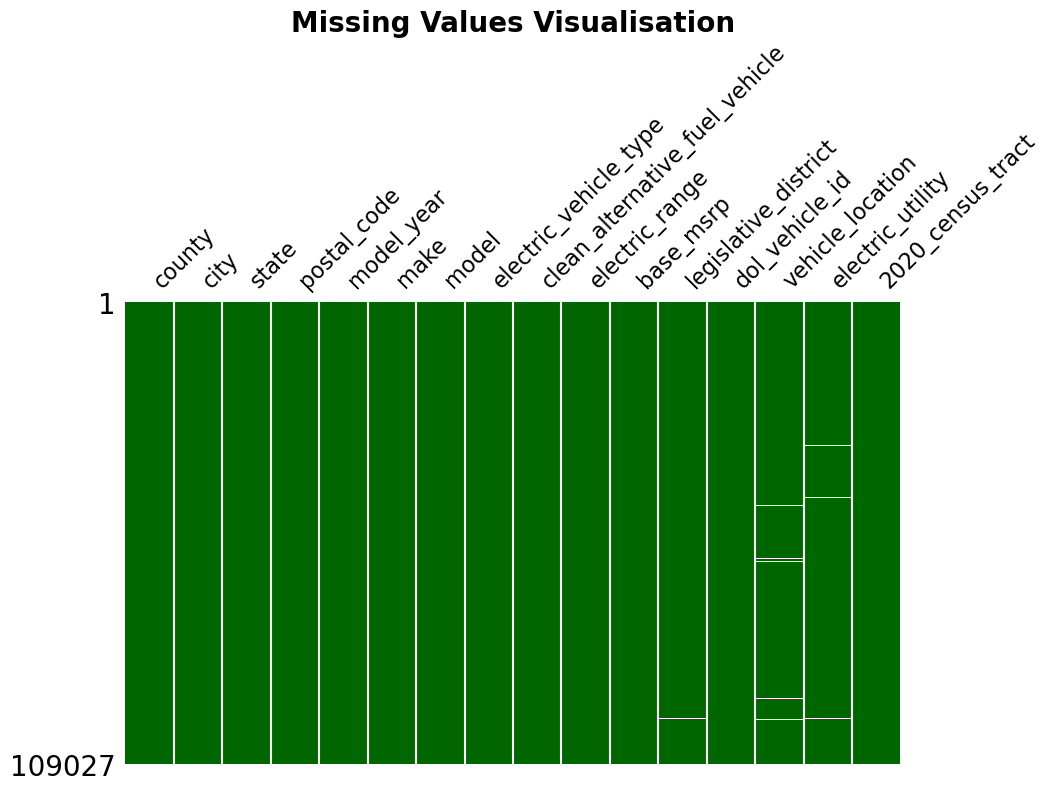

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
msno.matrix(df, color=(0, 0.4, 0), labels=True, ax=ax)
plt.title('Missing Values Visualisation', fontsize=20, fontweight='bold')
plt.show()

#### 5. IMPUTATION OF MISSING NUMERICAL VALUES

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Create an instance of IterativeImputer with a RandomForestRegressor estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

In [20]:
# Fit the imputer to the data
imputer.fit(df[['legislative_district']])

IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

In [21]:
# Transform the data
data_imputed = imputer.transform(df[['legislative_district']])

In [22]:
df.isnull().sum()

county                               0
city                                 0
state                                0
postal_code                          0
model_year                           0
make                                 0
model                                4
electric_vehicle_type                0
clean_alternative_fuel_vehicle       0
electric_range                       0
base_msrp                            0
legislative_district               284
dol_vehicle_id                       0
vehicle_location                  3508
electric_utility                   431
2020_census_tract                    0
dtype: int64

#### 6. VISUALISATION OF IMPUTATION 

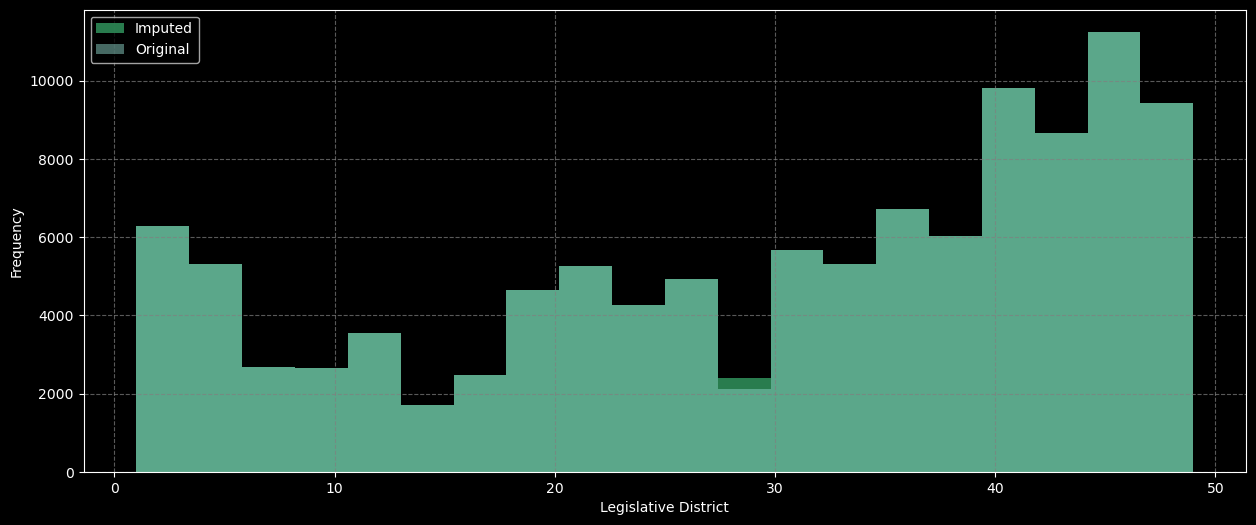

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.hist(data_imputed, bins=20, alpha=0.9, label='Imputed', color="seagreen")
plt.hist(df['legislative_district'], bins=20, alpha=0.5, label='Original')
plt.legend()
plt.xlabel('Legislative District')
plt.ylabel('Frequency')
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show()

In [24]:
df['legislative_district'] = data_imputed

In [25]:
df.legislative_district.isnull().sum()

0

In [26]:
# Drop the "vehicle_location" column
df = df.drop(columns=['vehicle_location'])

In [27]:
# Drop the "electric_utility" column
df = df.drop(columns=['electric_utility'])

In [28]:
# Remove rows with NaN values
df = df.dropna()

In [29]:
df.isnull().sum()

county                            0
city                              0
state                             0
postal_code                       0
model_year                        0
make                              0
model                             0
electric_vehicle_type             0
clean_alternative_fuel_vehicle    0
electric_range                    0
base_msrp                         0
legislative_district              0
dol_vehicle_id                    0
2020_census_tract                 0
dtype: int64

In [30]:
counties = sorted(df.county.unique())
print(counties)

['Adams', 'Alameda', 'Alexandria', 'Allegheny', 'Anchorage', 'Anne Arundel', 'Arapahoe', 'Asotin', 'Bartow', 'Bell', 'Benton', 'Bexar', 'Boulder', 'Bryan', 'Burlington', 'Calvert', 'Camden', 'Carroll', 'Charles', 'Charleston', 'Chaves', 'Chelan', 'Chesapeake', 'Clackamas', 'Clallam', 'Clark', 'Columbia', 'Contra Costa', 'Cook', 'Coryell', 'Cowlitz', 'Cumberland', 'Danville', 'DeKalb', 'Denton', 'District of Columbia', 'Douglas', 'Duval', 'El Paso', 'Fairbanks North Star', 'Fairfax', 'Ferry', 'Franklin', 'Frederick', 'Galveston', 'Garfield', 'Geary', 'Grant', 'Grays Harbor', 'Hamilton', 'Harris', 'Harrison', 'Hidalgo', 'Hillsborough', 'Hoke', 'Honolulu', 'Houston', 'Howard', 'Hudson', 'Island', 'Jackson', 'Jefferson', 'Juneau', 'Kent', 'Kern', 'King', 'Kings', 'Kitsap', 'Kittitas', 'Klickitat', 'Kootenai', 'Lake', 'Laramie', 'Larimer', 'Las Animas', 'Leavenworth', 'Lewis', 'Lincoln', 'Los Angeles', 'Loudoun', 'Louisa', 'Manassas', 'Maricopa', 'Marin', 'Mason', 'Mecklenburg', 'Middlesex'

In [31]:
df.shape

(109023, 14)

#### 7.HIGHEST COUNTY IN DATASET

In [32]:
len(df.county.value_counts())

165

#### We have total 165 counties on dataset.

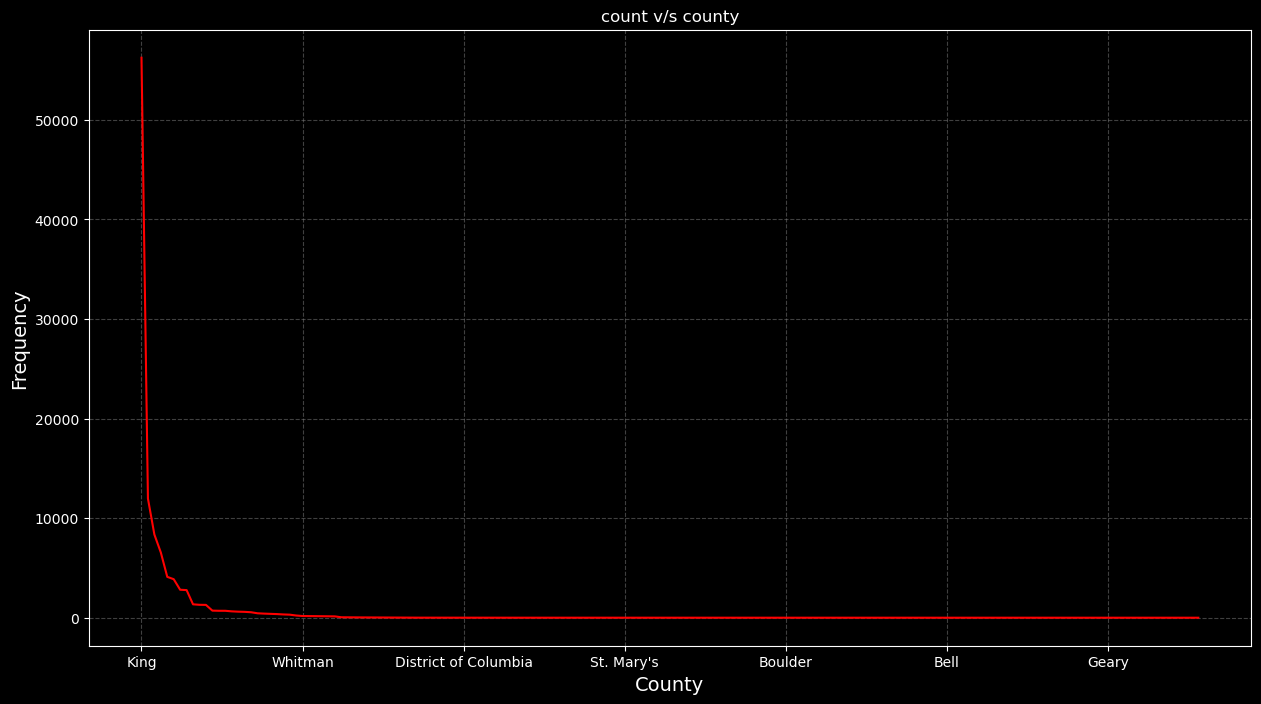

In [33]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
df.county.value_counts().plot(color="red")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel("County",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("count v/s county")
plt.show()

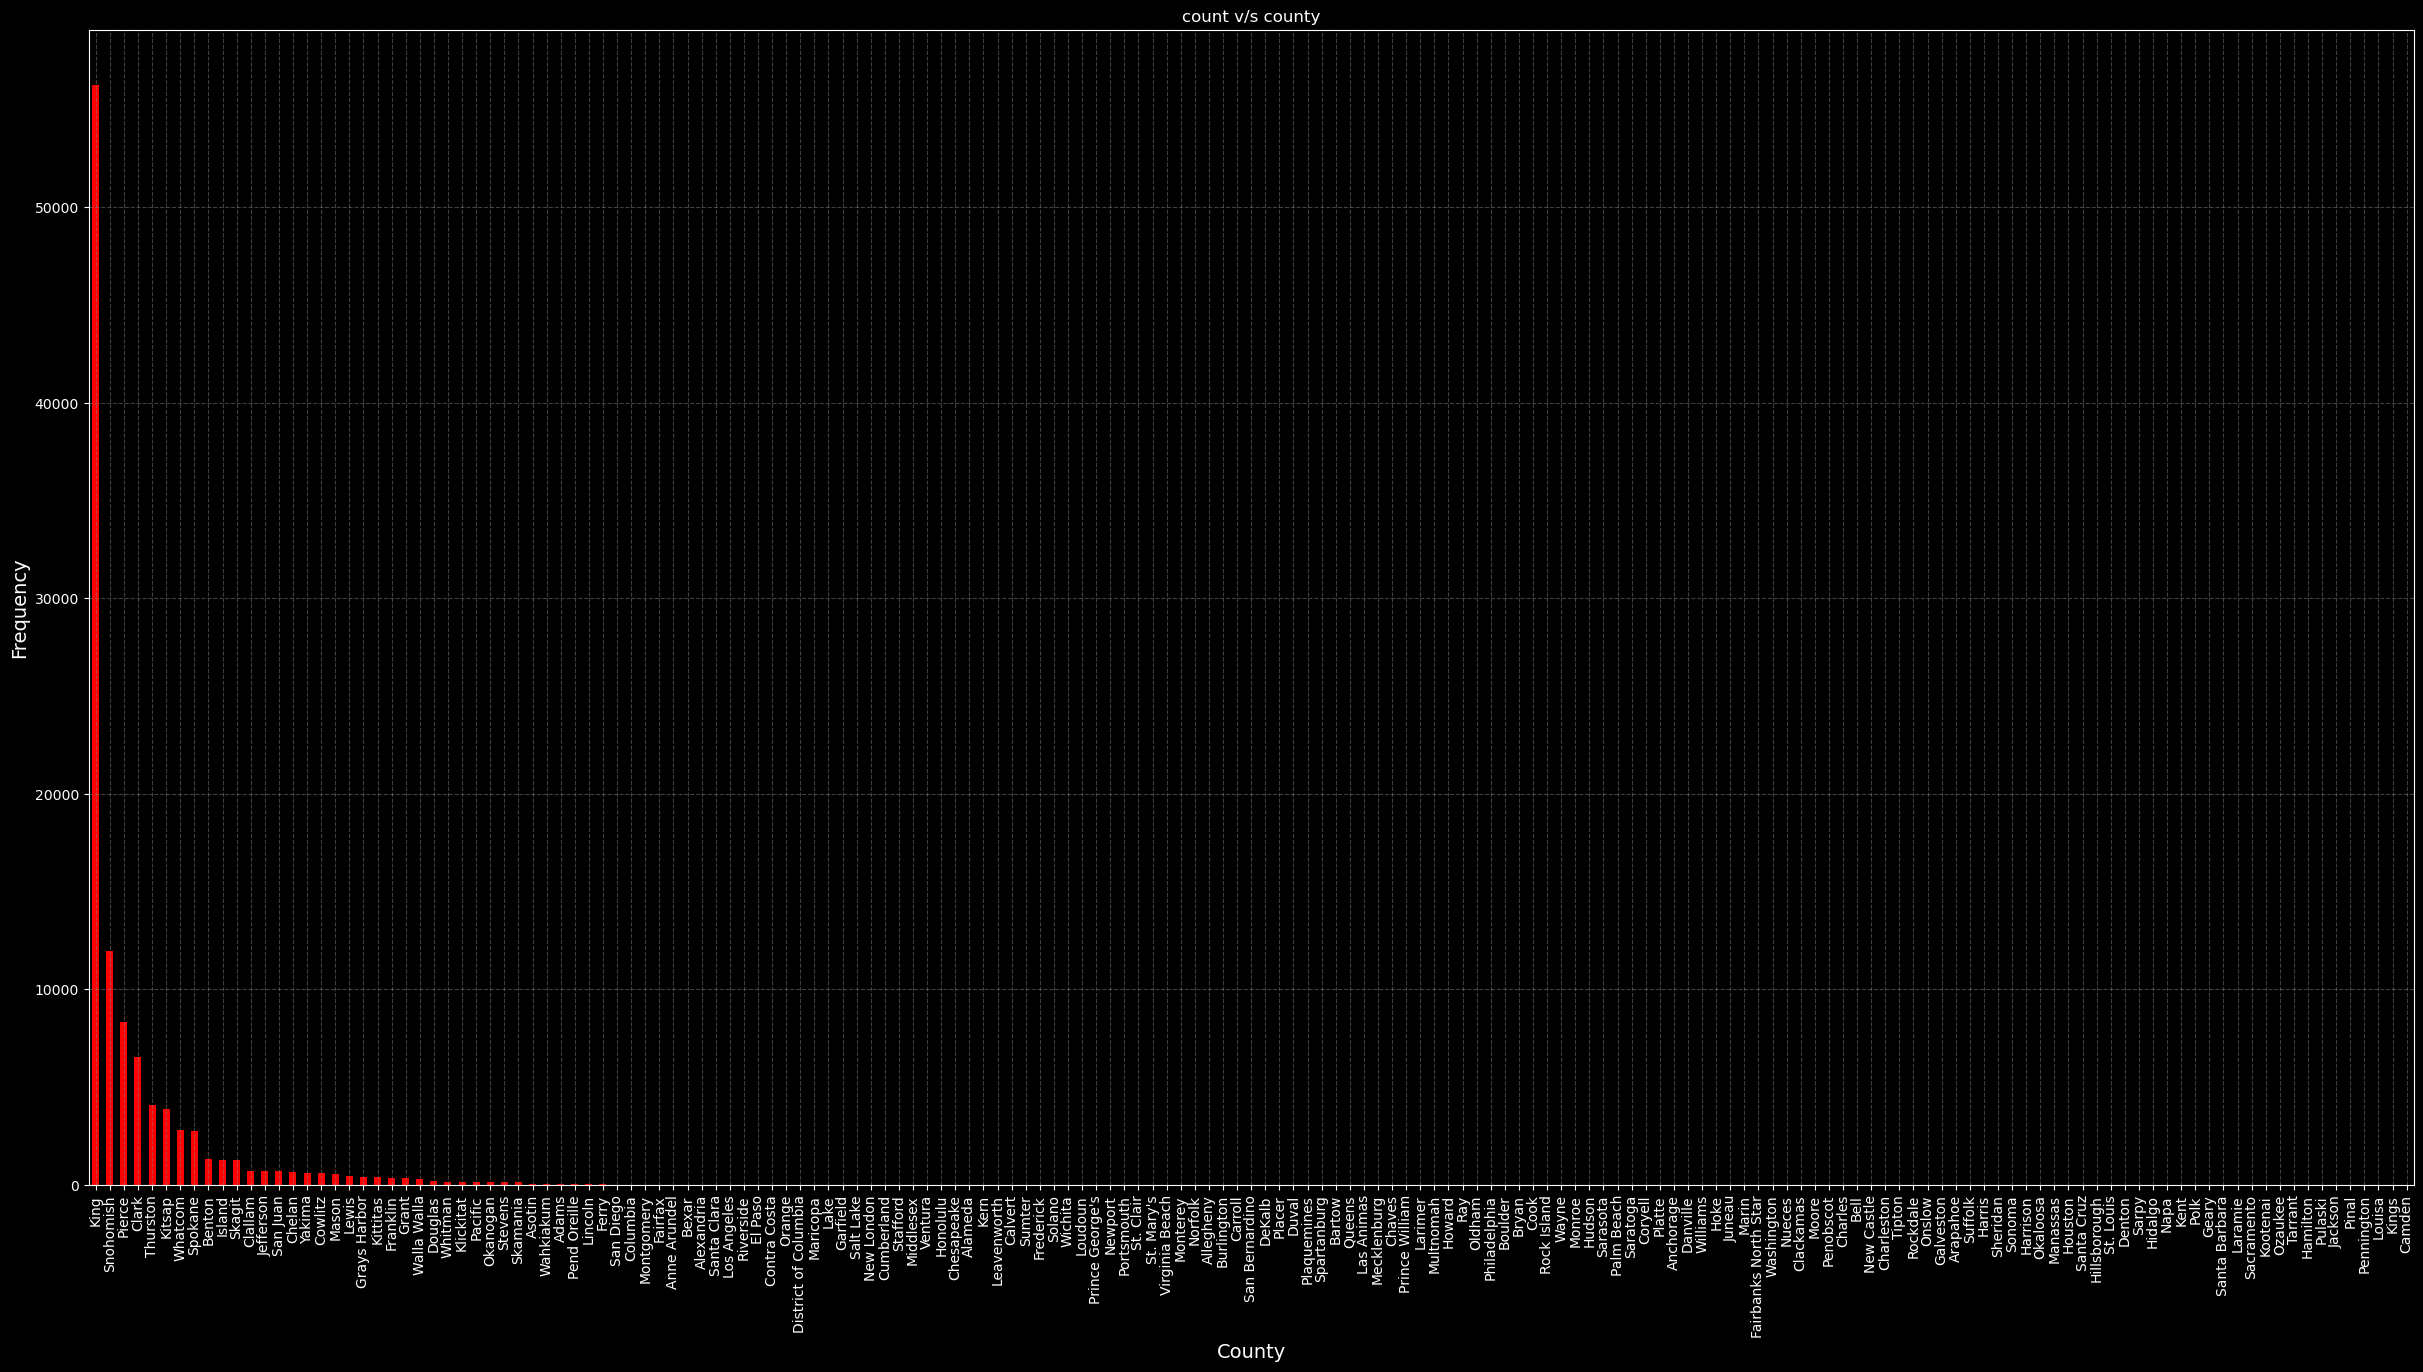

In [34]:
plt.style.use('dark_background')
plt.figure(figsize=(30,15))
df.county.value_counts().plot.bar(color="red")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel("County",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("count v/s county")
plt.show()

##### If we zoom our chart, we can see kings has the highest frequency in dataset. we can consider that king county has the highest amount of cars.

In [35]:
df.columns

Index(['county', 'city', 'state', 'postal_code', 'model_year', 'make', 'model',
       'electric_vehicle_type', 'clean_alternative_fuel_vehicle',
       'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id',
       '2020_census_tract'],
      dtype='object')

In [36]:
df.columns

Index(['county', 'city', 'state', 'postal_code', 'model_year', 'make', 'model',
       'electric_vehicle_type', 'clean_alternative_fuel_vehicle',
       'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id',
       '2020_census_tract'],
      dtype='object')

#### 8. TOP TEN ELECTRIC CARS & COUNTY

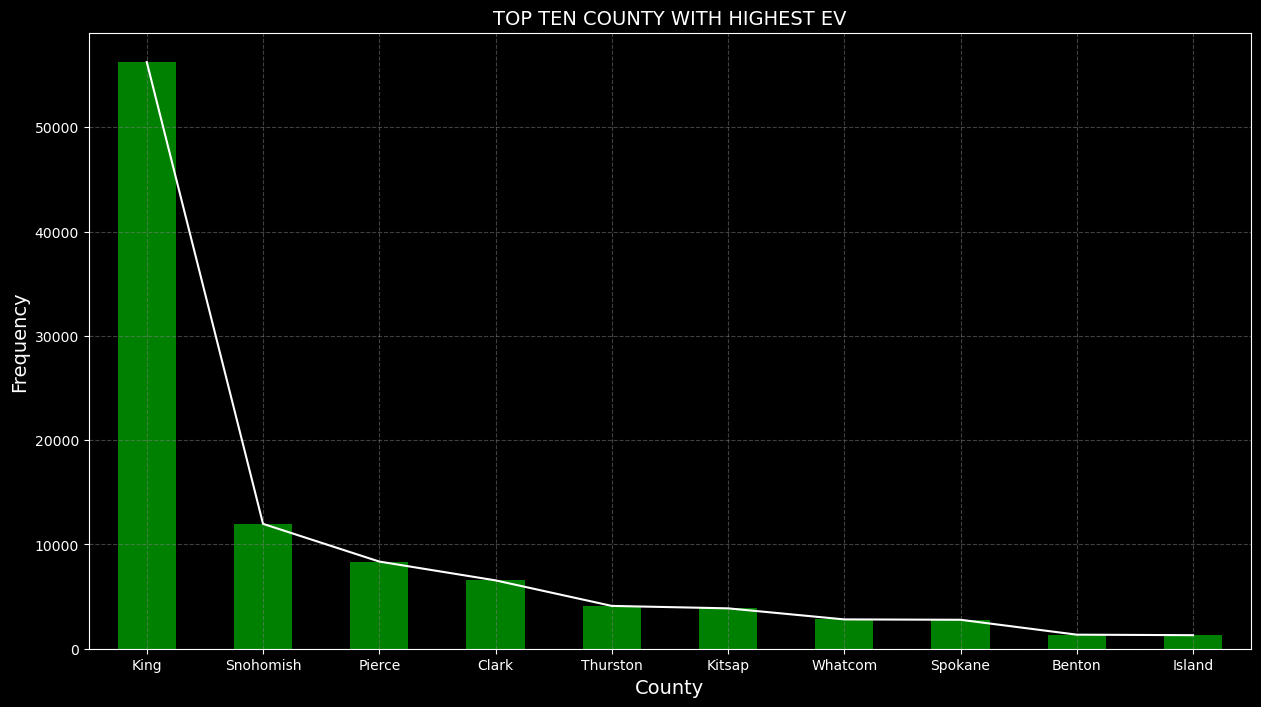

In [37]:
top_5_county = df.county.value_counts().head(10)
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
top_5_county.plot.bar(color="green")
top_5_county.plot(color="white")
plt.xlabel("County",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("TOP TEN COUNTY WITH HIGHEST EV",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

County name King and Snohomish has the highest electric car in United State.

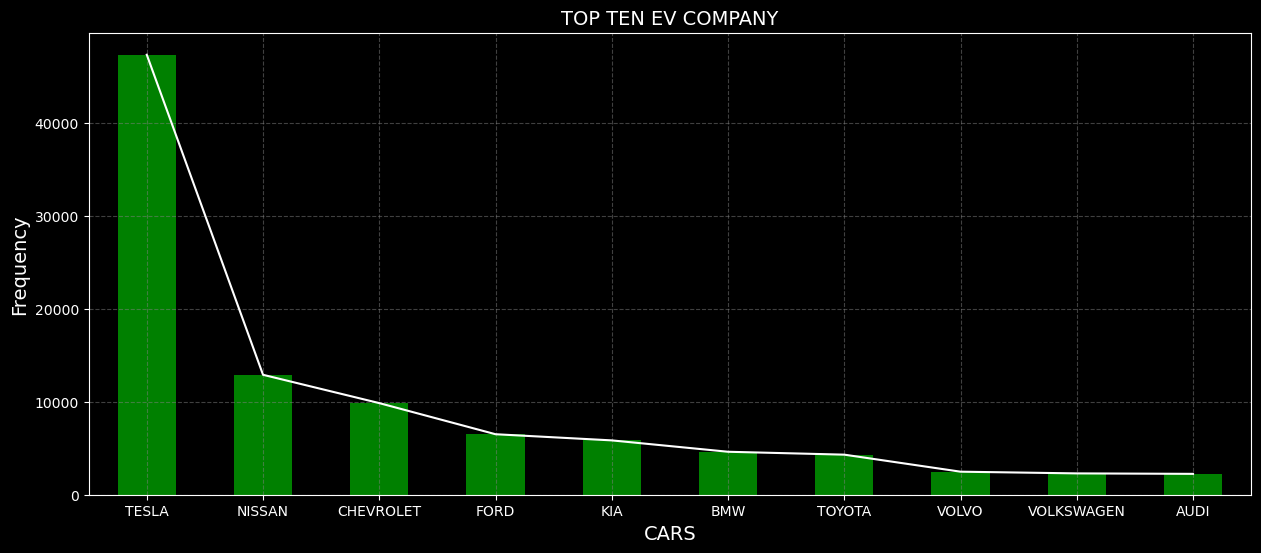

In [38]:
top_5_make = df.make.value_counts().head(10)
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
top_5_make.plot.bar(color="green")
top_5_make.plot(color="white")
plt.xlabel("CARS",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("TOP TEN EV COMPANY",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)

Tesla is the highest car selling company in the united state.

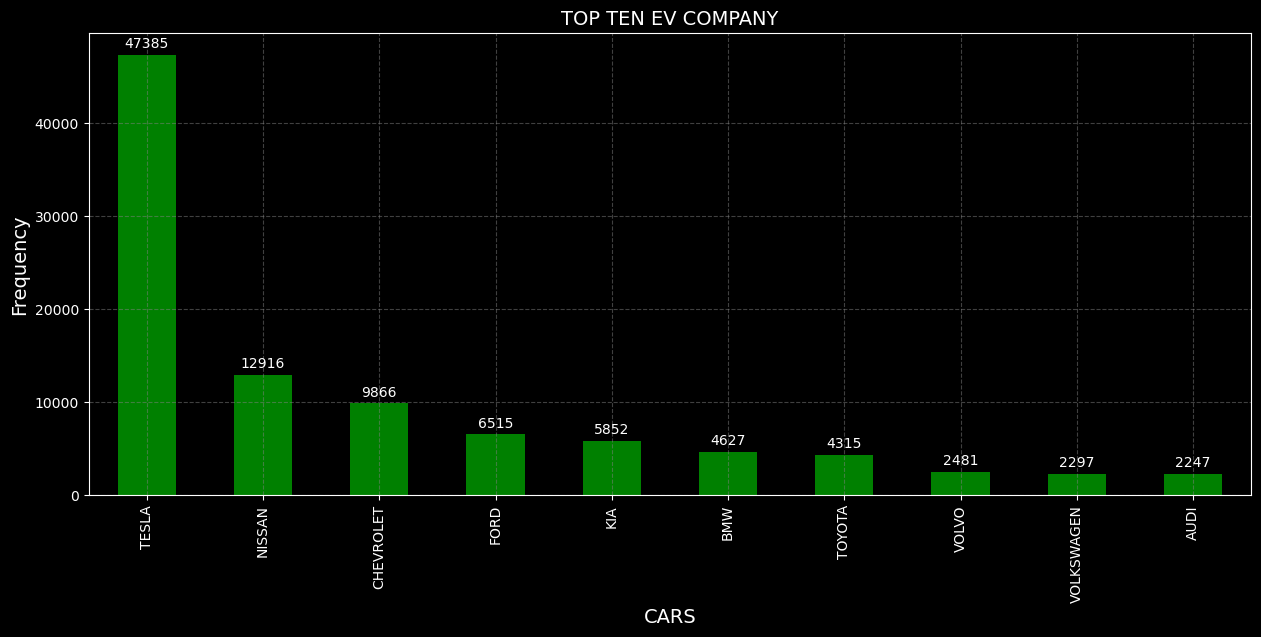

In [39]:
top_5_make = df.make.value_counts().head(10)
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = top_5_make.plot.bar(color="green")

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel("CARS",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("TOP TEN EV COMPANY",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

#### TOP TEN SELLING CARS

1. Tesla is the first highest selling car
2. Nissan is the second highest selling car
3. Chevrolet is the third highest selling car
4. Ford is the fourth highest selling car
5. Kia is the fifth highest selling car
6. BMW is the sixth highest selling car
7. Toyota is the seventh highest selling car
8. Volvo is the eight highest selling car
9. Volkswagen is the ninth highest selling car
10. Audi is the tenth highest selling car

#### CREATING SEPRATE DATA FRAME ACCORDING TO CAR COMPANY

In [40]:
tesla = df[df["make"] == "TESLA"]
nissan = df[df["make"] == "NISSAN"]
kia = df[df["make"]=="KIA"]
ford = df[df["make"]=="FORD"]
chevrolet = df[df["make"]=="CHEVROLET"]
bmw = df[df["make"]=="BMW"]
toyota = df[df["make"]=="TOYOTA"]
audi =df[df["make"]=="AUDI"]
volkswagen = df[df["make"]=="VOLKSWAGEN"]
volvo = df[df["make"]=="VOLVO"]

#### 9. TESLA CAR CHART

In [41]:
tesla.model_year.value_counts().sort_index()

2008       26
2010       26
2011        7
2012      136
2013      820
2014      680
2015     1093
2016     1629
2017     1670
2018     7968
2019     4436
2020     6921
2021    11041
2022    10932
Name: model_year, dtype: int64

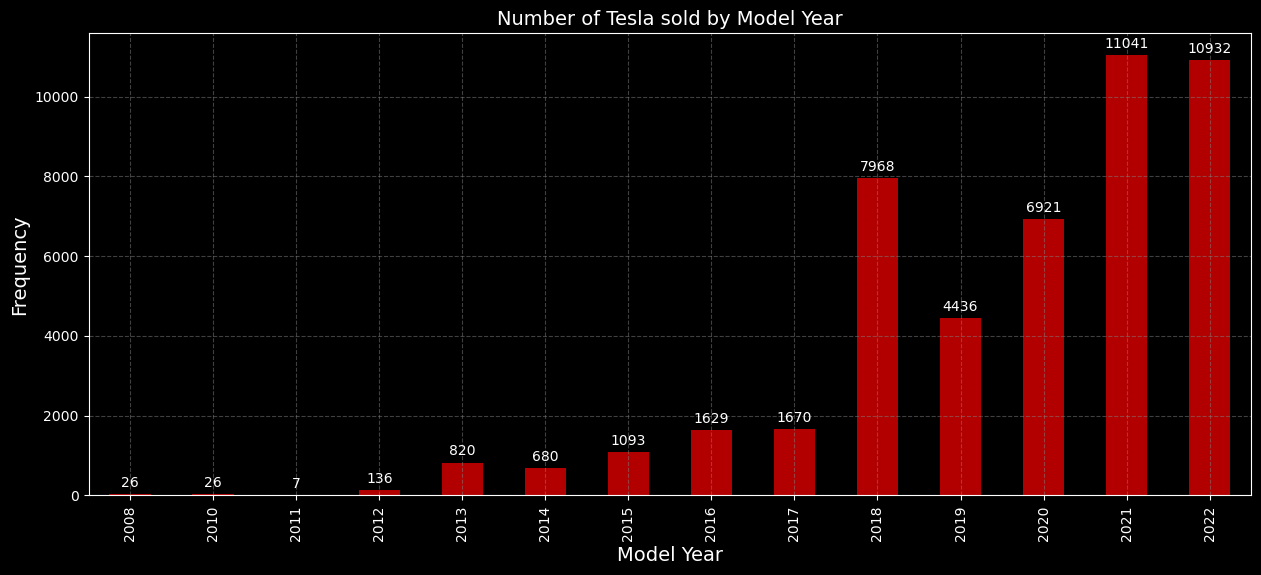

In [42]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = tesla.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Tesla sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [43]:
tesla.model.value_counts()

MODEL 3     21715
MODEL Y     14468
MODEL S      7198
MODEL X      3945
ROADSTER       59
Name: model, dtype: int64

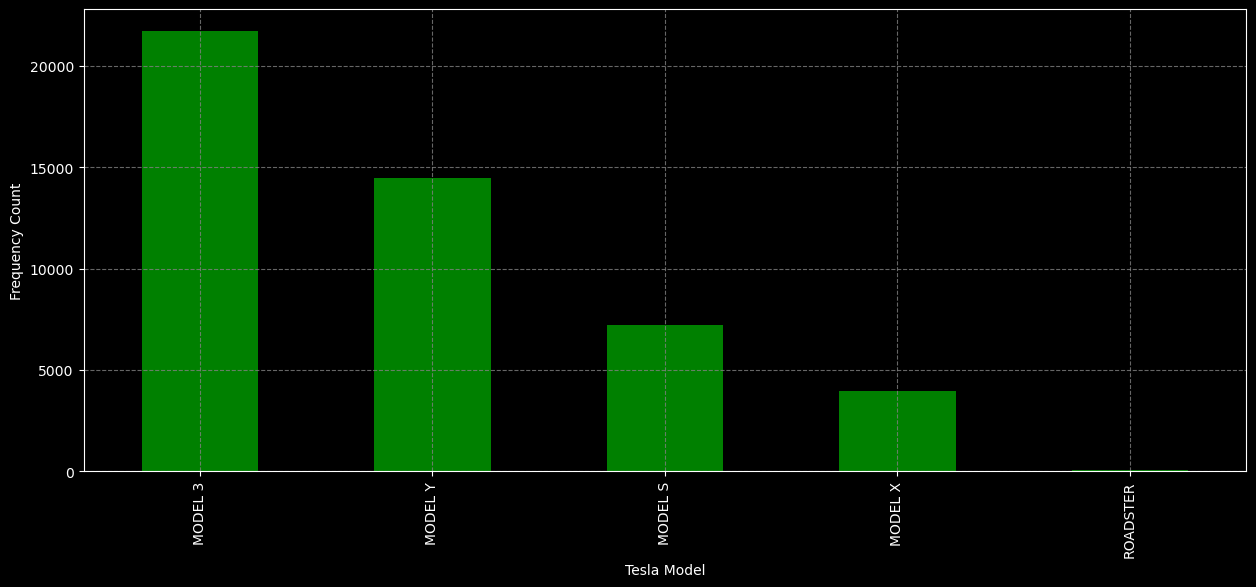

In [44]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
tesla.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Tesla Model")
plt.ylabel("Frequency Count")
plt.show()

#### 10. NISSAN CAR CHART

In [62]:
nissan.model_year.value_counts().sort_index()

2011     757
2012     612
2013    1986
2014     692
2015    1876
2016    1212
2017     944
2018    1250
2019    1415
2020     614
2021     520
2022    1000
2023      38
Name: model_year, dtype: int64

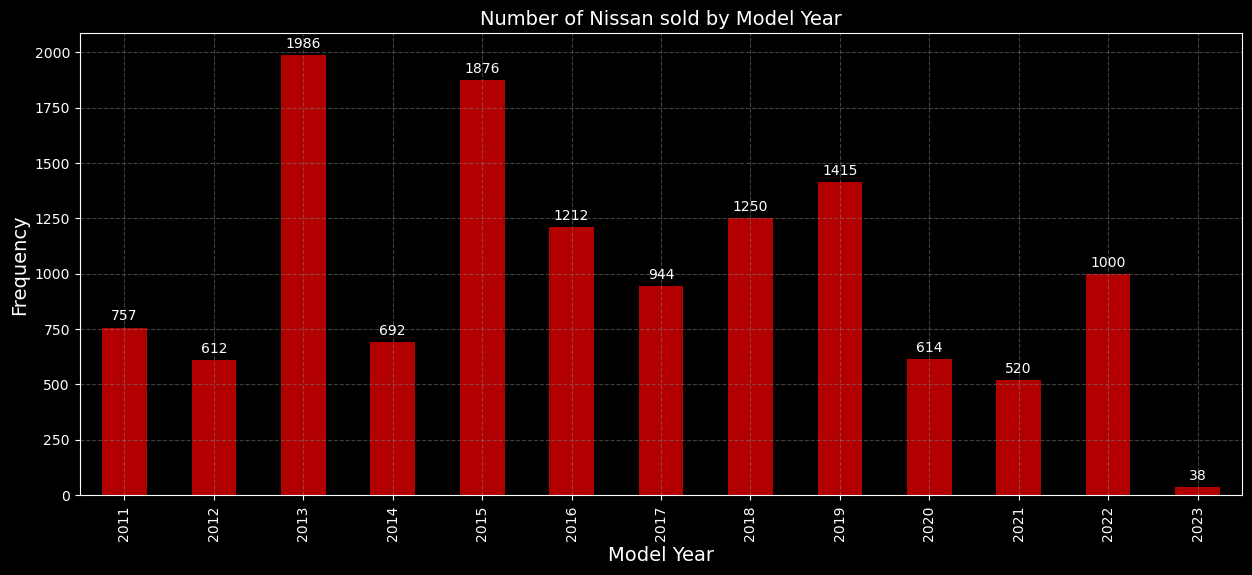

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = nissan.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Nissan sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [64]:
nissan.model.value_counts()

LEAF    12916
Name: model, dtype: int64

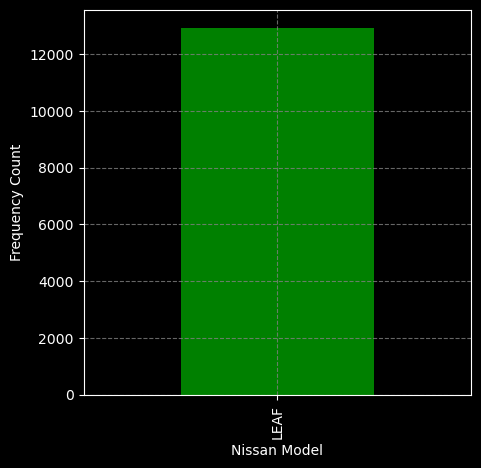

In [154]:
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
nissan.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Nissan Model")
plt.ylabel("Frequency Count")
plt.show()

#### 11. CHEVROLET CAR CHART

In [78]:
chevrolet.model_year.value_counts()

2017    2758
2018    1144
2020    1028
2019     980
2013     817
2014     733
2022     685
2012     496
2015     470
2021     371
2016     303
2011      75
2023       5
1997       1
Name: model_year, dtype: int64

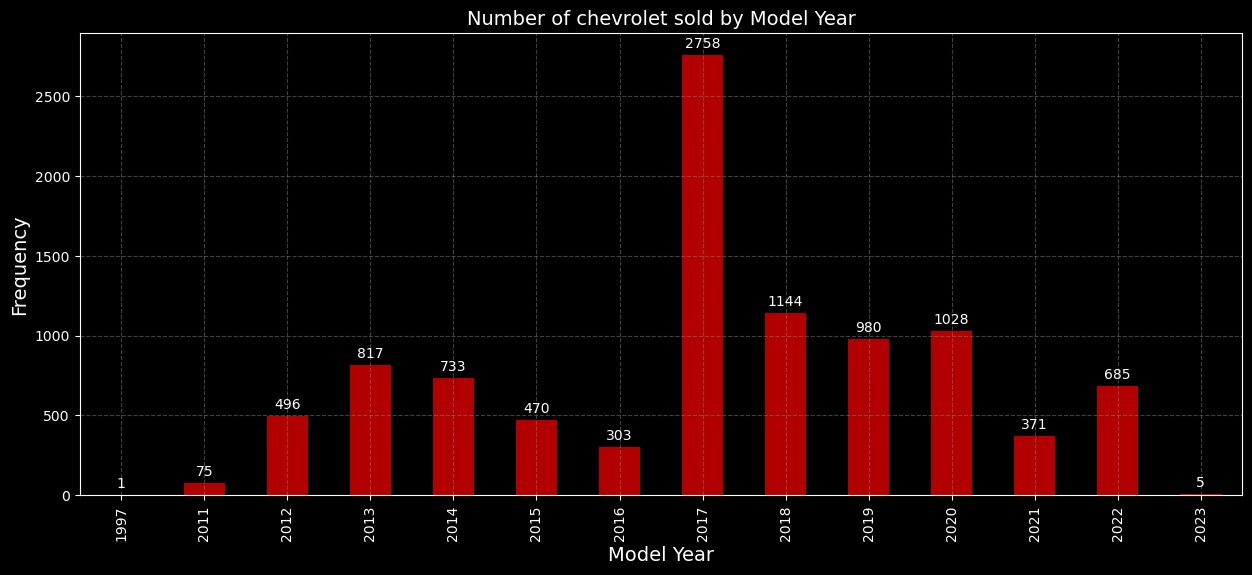

In [79]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = chevrolet.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of chevrolet sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [80]:
chevrolet.model.value_counts()

VOLT           4938
BOLT EV        4675
SPARK           249
BOLT EUV          3
S-10 PICKUP       1
Name: model, dtype: int64

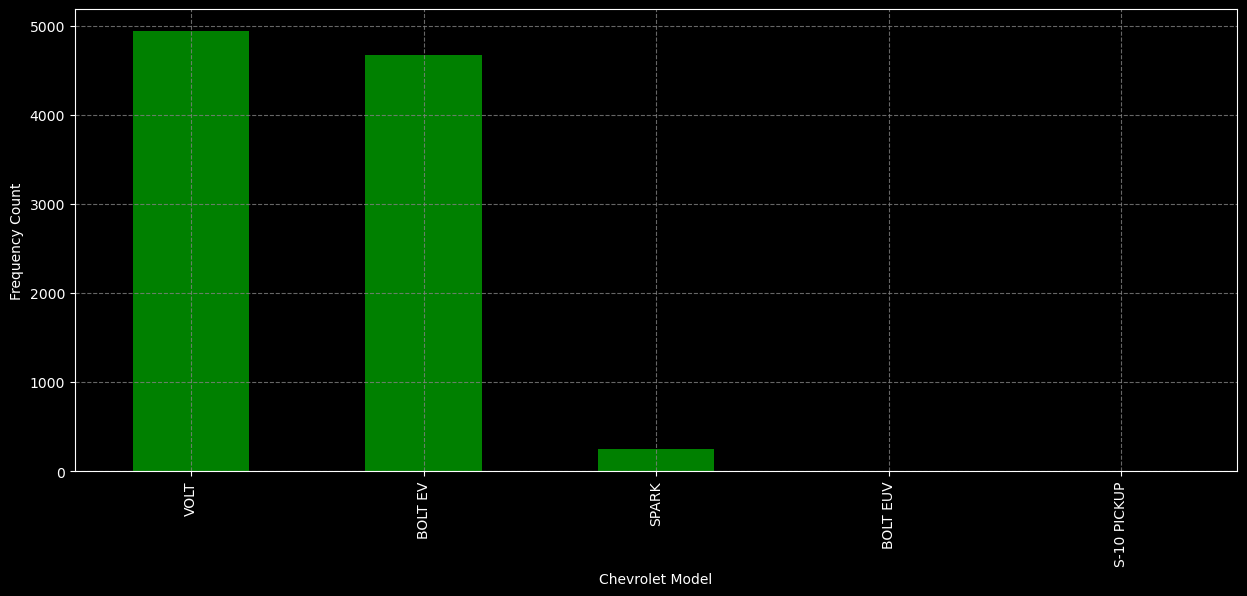

In [81]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
chevrolet.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Chevrolet Model")
plt.ylabel("Frequency Count")
plt.show()

#### 12. FORD CAR CHART

In [82]:
ford.model_year.value_counts()

2021    1887
2022     916
2016     801
2013     679
2017     662
2014     622
2015     559
2018     164
2019     132
2020      64
2012      15
2000      10
1999       3
1998       1
Name: model_year, dtype: int64

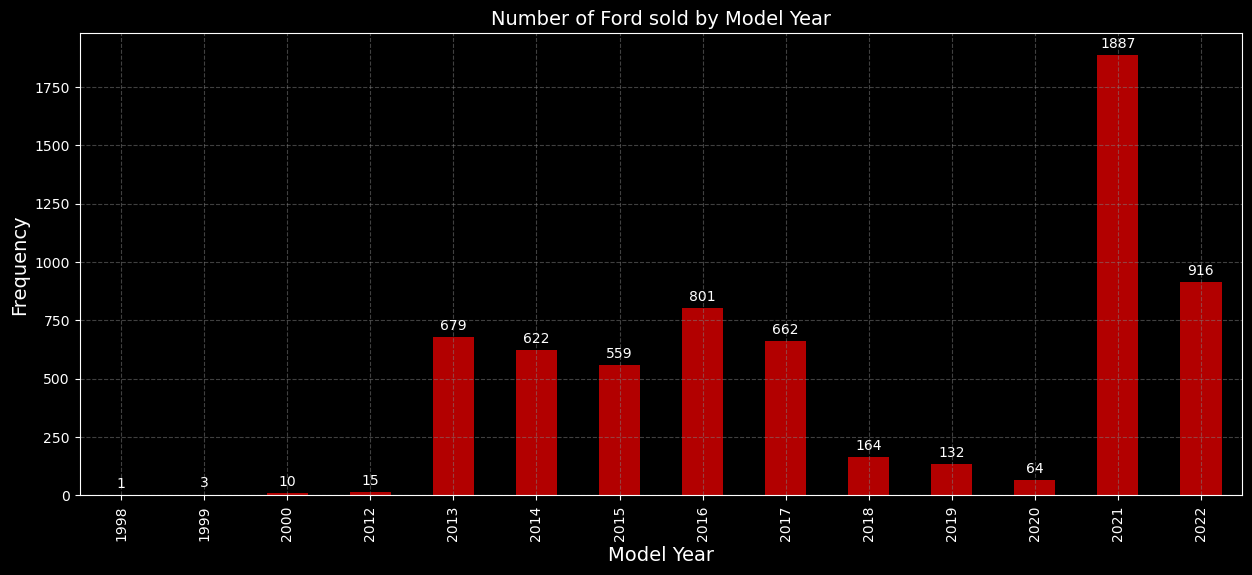

In [83]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = ford.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Ford sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [84]:
ford.model.value_counts()

FUSION            1856
C-MAX             1577
MUSTANG MACH-E    1467
F-150             1053
FOCUS              265
ESCAPE             198
TRANSIT             85
RANGER              14
Name: model, dtype: int64

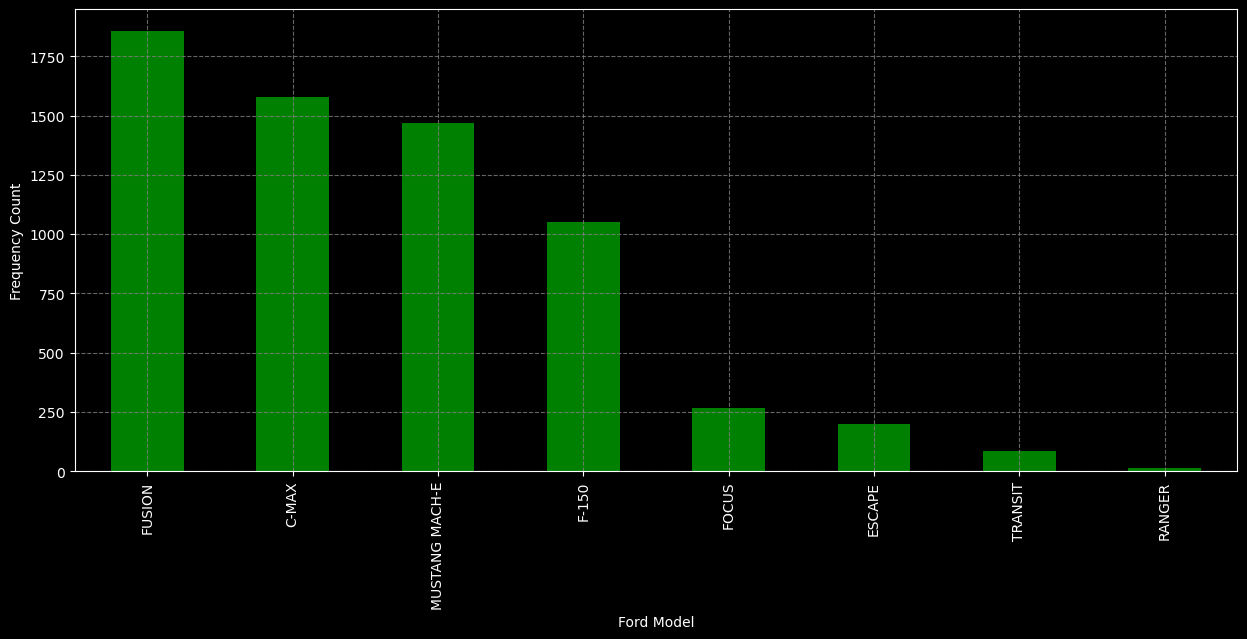

In [85]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ford.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Ford Model")
plt.ylabel("Frequency Count")
plt.show()

#### 13. KIA CAR CHART

In [96]:
kia.model_year.value_counts().sort_index()

2015      23
2016     417
2017    1286
2018     321
2019    1105
2020     538
2021      71
2022    2065
2023      26
Name: model_year, dtype: int64

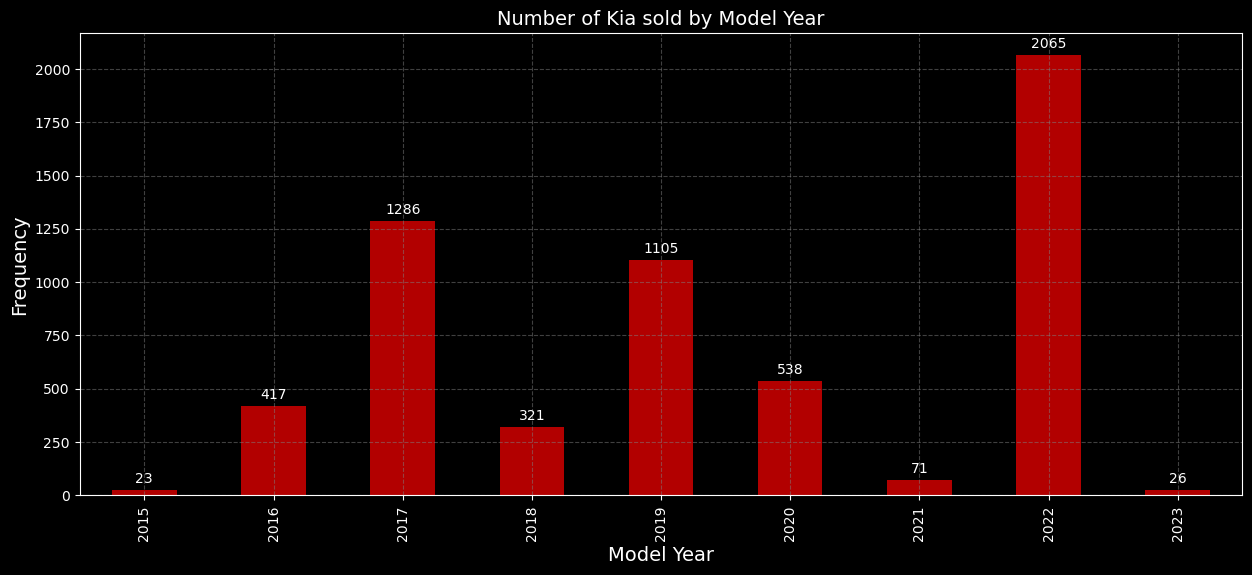

In [97]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = kia.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Kia sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [98]:
kia.model.value_counts()

NIRO                     3318
EV6                       939
SOUL                      440
SORENTO                   363
SOUL EV                   244
NIRO PLUG-IN HYBRID       234
NIRO ELECTRIC             166
OPTIMA                    106
SPORTAGE                   26
OPTIMA PLUG-IN HYBRID      16
Name: model, dtype: int64

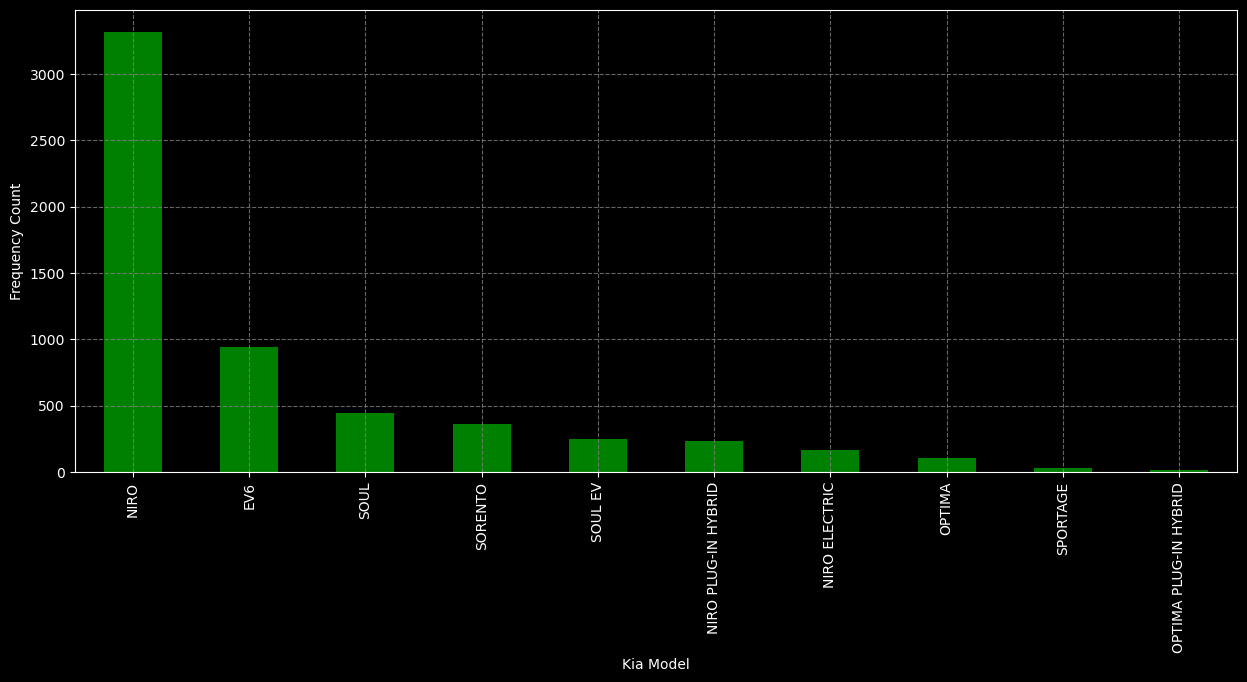

In [99]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
kia.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Kia Model")
plt.ylabel("Frequency Count")
plt.show()

#### 14. BMW CAR CHART

In [100]:
bmw.model_year.value_counts().sort_index()

2014    465
2015    413
2016    398
2017    690
2018    714
2019    270
2020    145
2021    630
2022    890
2023     12
Name: model_year, dtype: int64

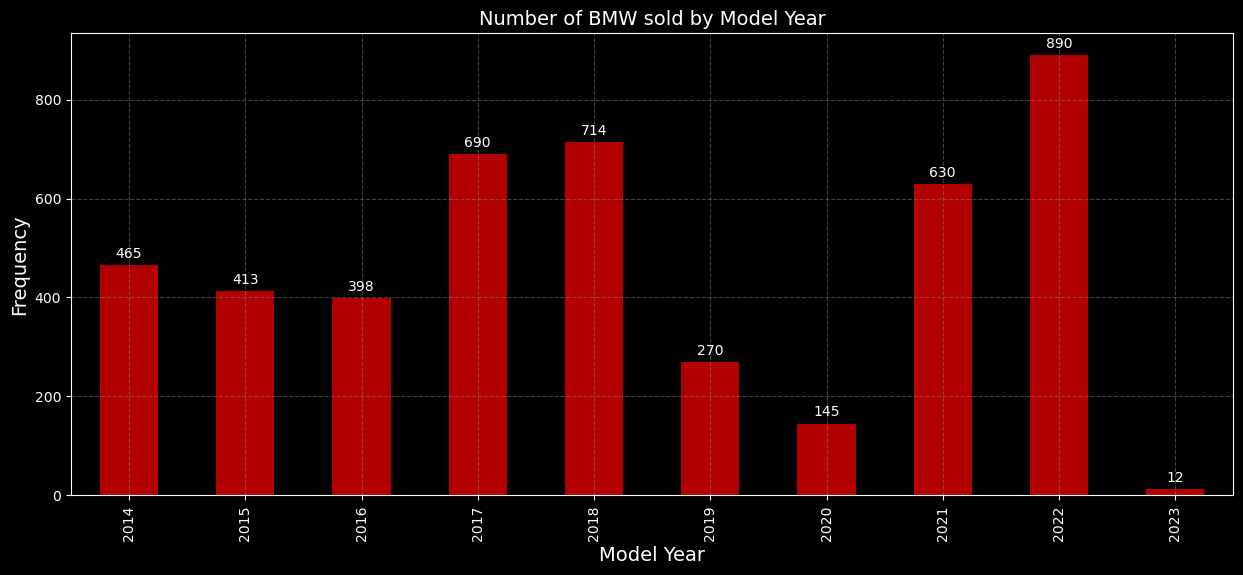

In [101]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = bmw.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of BMW sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [102]:
bmw.model.value_counts()

I3             1911
X5             1421
330E            303
X3              289
530E            185
530E XDRIVE     140
IX              130
I4              104
I8              103
740E XDRIVE      32
745E              7
745LE             2
Name: model, dtype: int64

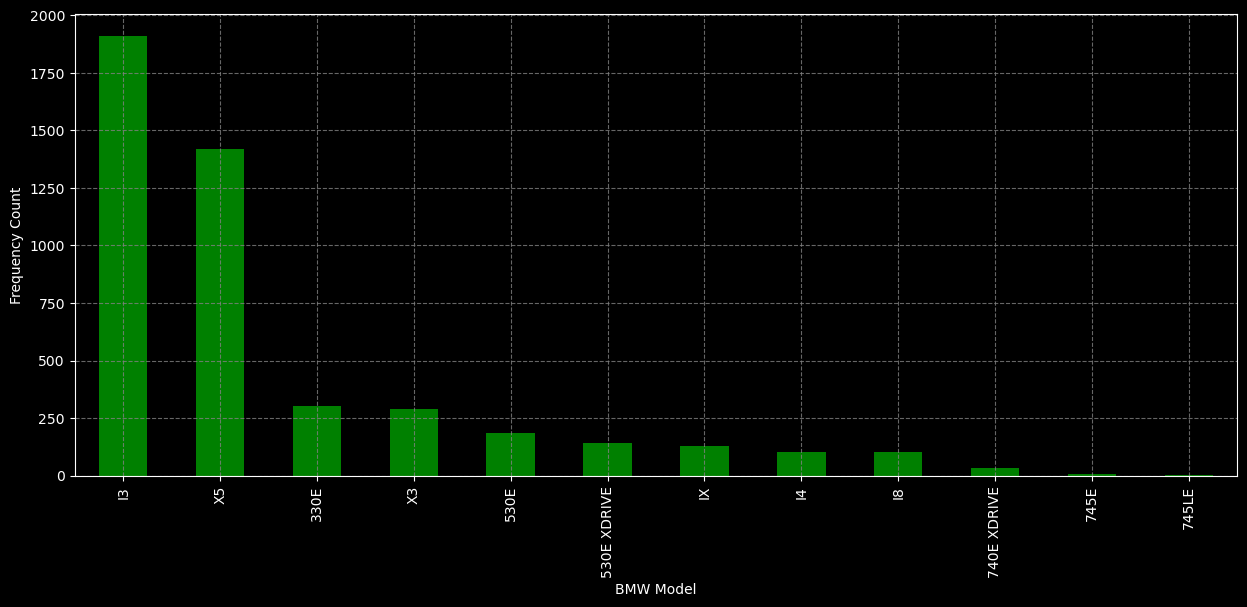

In [155]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
bmw.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("BMW Model")
plt.ylabel("Frequency Count")
plt.show()

#### 15. TOYOTA CAR CHART

In [104]:
toyota.model_year.value_counts().sort_index()

2002      2
2012    391
2013    304
2014    220
2015     89
2017    898
2018    663
2019    187
2020    300
2021    923
2022    338
Name: model_year, dtype: int64

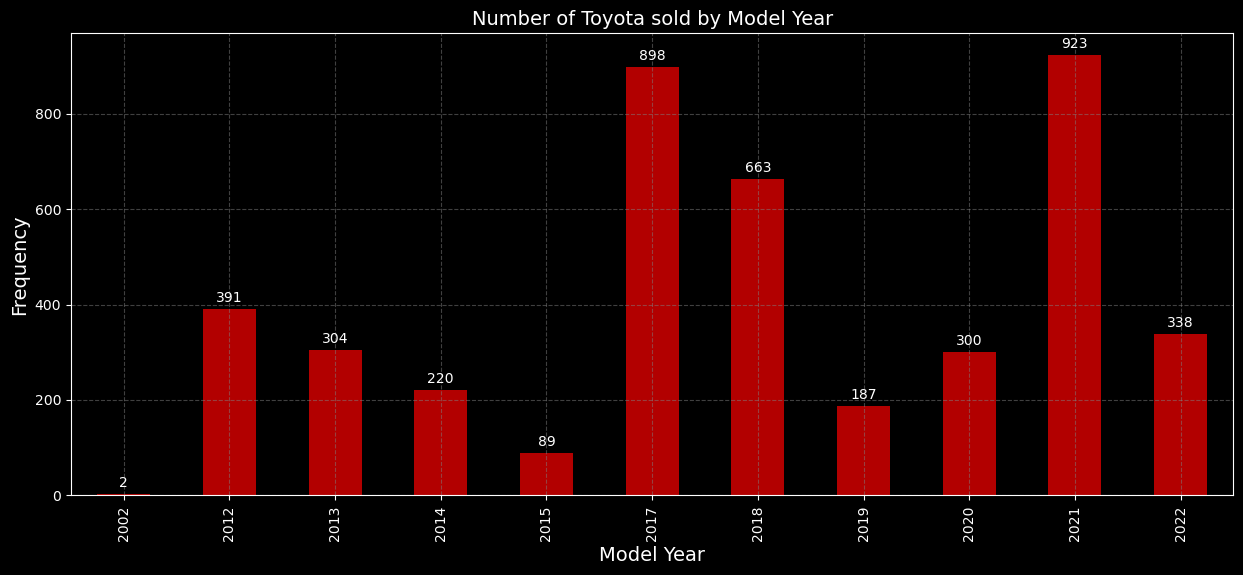

In [105]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = toyota.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Toyota sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [106]:
toyota.model.value_counts()

PRIUS PRIME             2346
RAV4 PRIME               963
PRIUS PLUG-IN            942
RAV4                      63
PRIUS PLUG-IN HYBRID       1
Name: model, dtype: int64

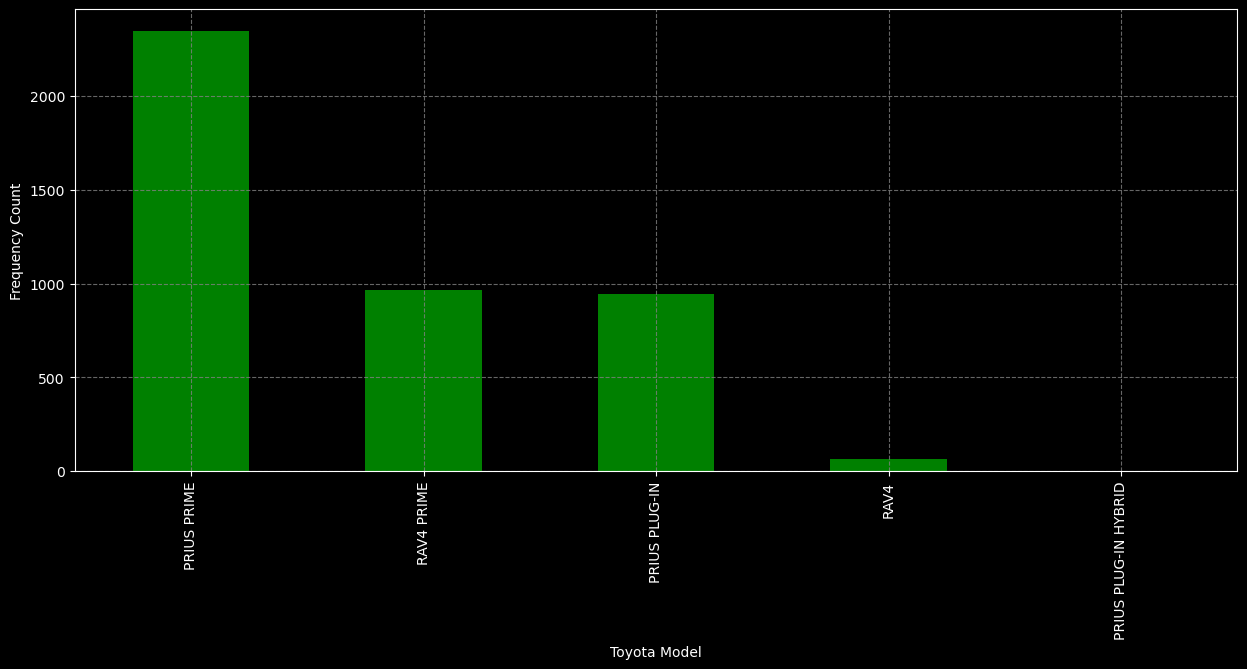

In [156]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
toyota.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Toyota Model")
plt.ylabel("Frequency Count")
plt.show()

#### 16. AUDI CAR CHART

In [108]:
audi.model_year.value_counts().sort_index()

2016    210
2017    192
2018    165
2019    390
2020    228
2021    538
2022    523
2023      1
Name: model_year, dtype: int64

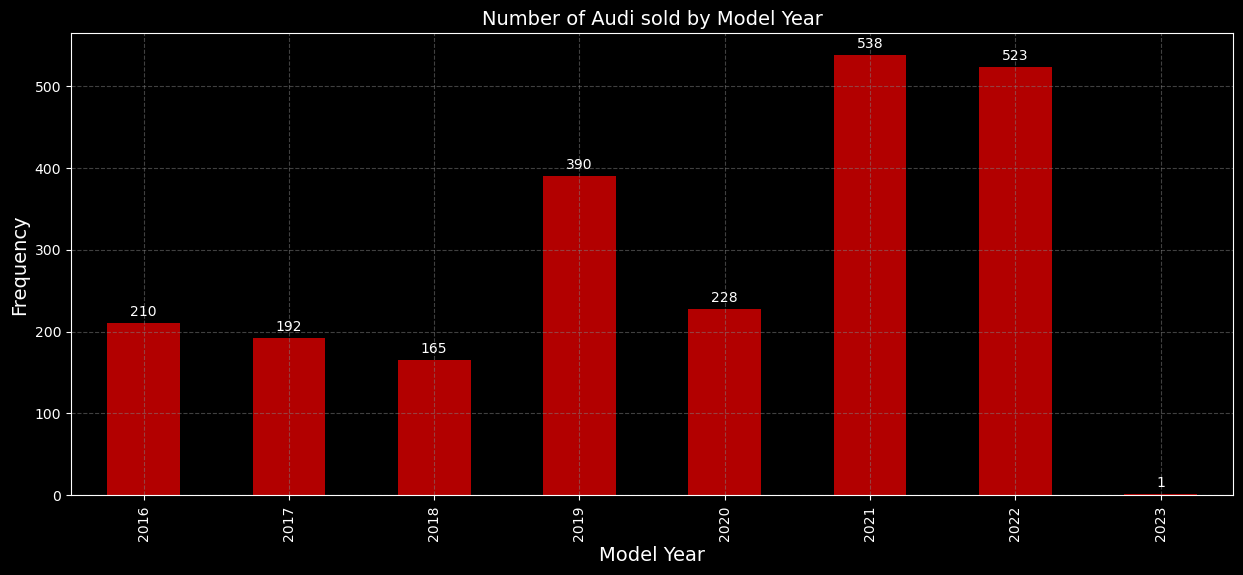

In [109]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = audi.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Audi sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [110]:
audi.model.value_counts()

E-TRON              781
A3                  567
Q5 E                480
E-TRON SPORTBACK    165
Q5                  141
E-TRON GT            73
RS E-TRON GT         16
A7                   11
Q4                   10
A8 E                  3
Name: model, dtype: int64

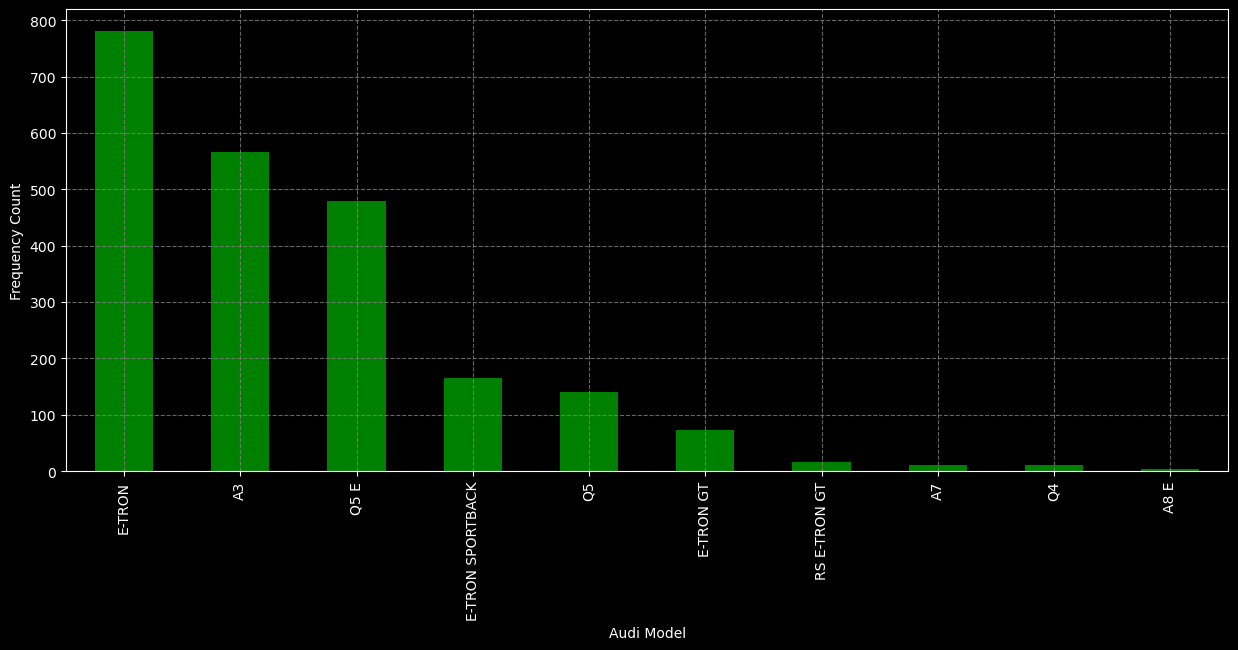

In [157]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
audi.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Audi Model")
plt.ylabel("Frequency Count")
plt.show()

#### 17. VOLKSWAGEN CAR CHART

In [112]:
volkswagen.model_year.value_counts()

2021    988
2019    501
2016    328
2022    261
2015    126
2017     54
2018     39
Name: model_year, dtype: int64

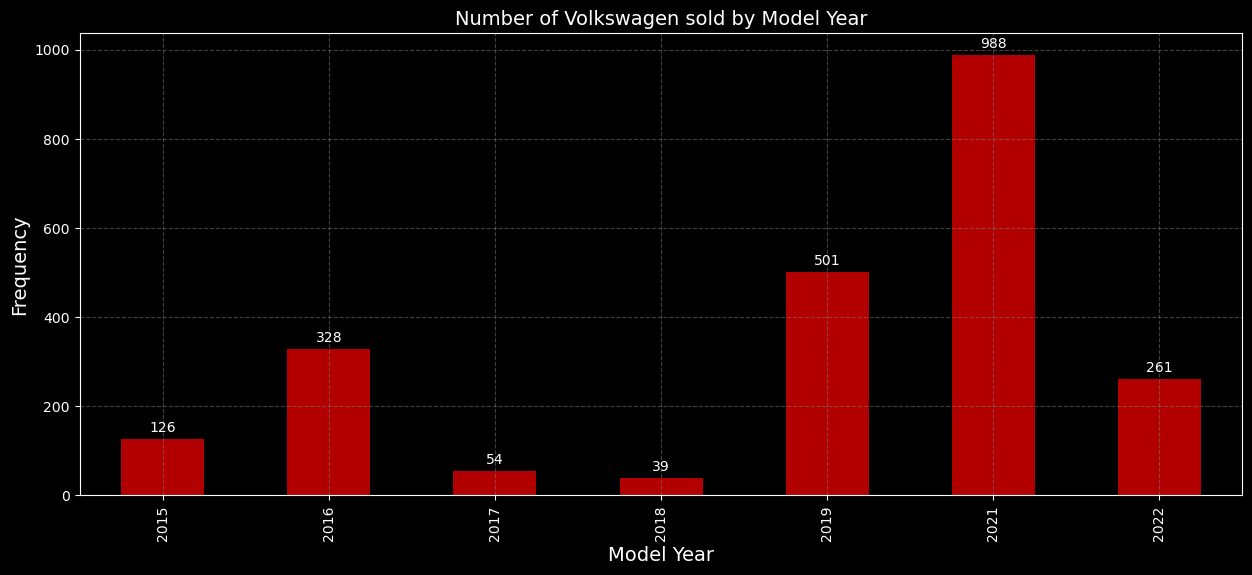

In [113]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = volkswagen.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Volkswagen sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [114]:
volkswagen.model.value_counts()

ID.4      1249
E-GOLF    1048
Name: model, dtype: int64

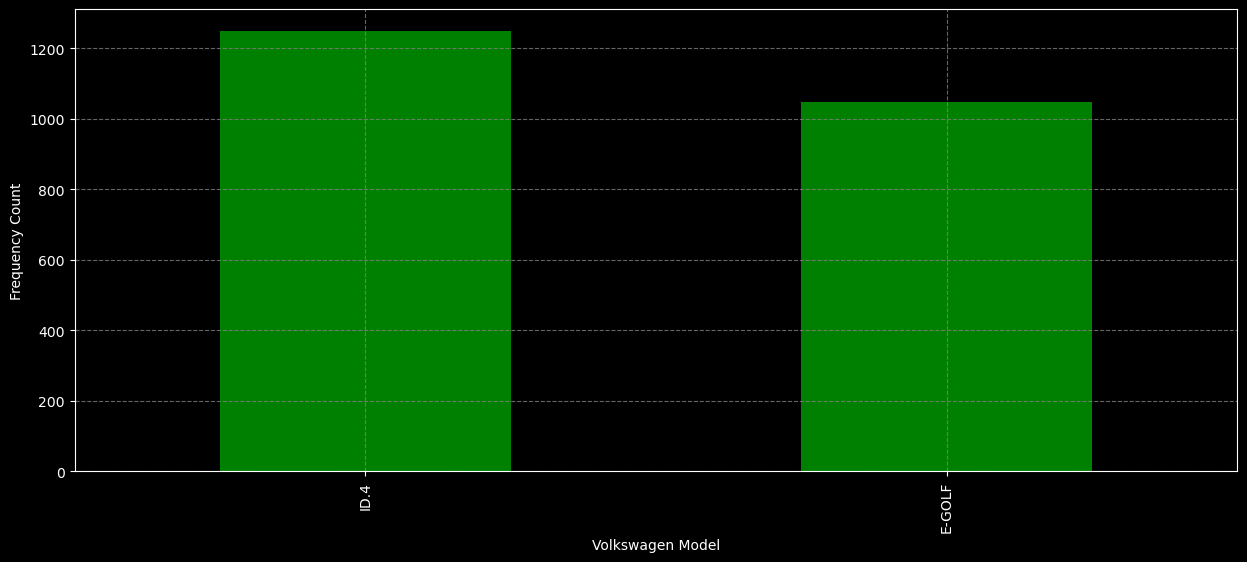

In [115]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
volkswagen.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Volkswagen Model")
plt.ylabel("Frequency Count")
plt.show()

#### 18. VOLVO CAR CHART

In [126]:
volvo.model_year.value_counts().sort_index()

2016    113
2017    115
2018    231
2019    243
2020    188
2021    622
2022    968
2023      1
Name: model_year, dtype: int64

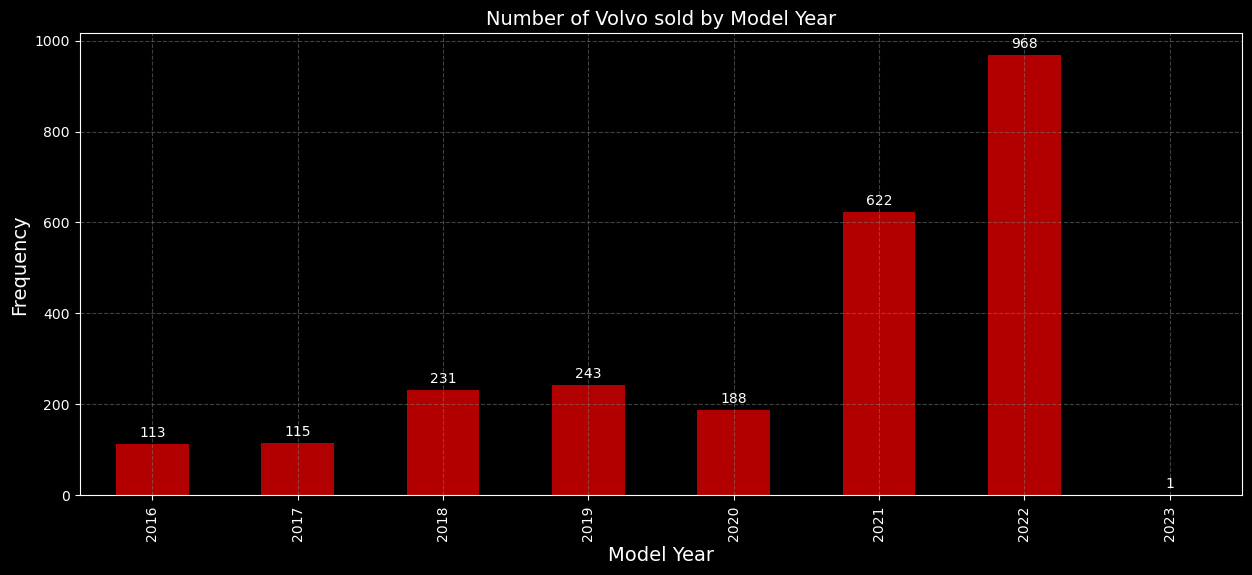

In [127]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = volvo.model_year.value_counts().sort_index().plot.bar(color="red", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel("Model Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of Volvo sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In [128]:
volvo.model.value_counts()

XC90             1005
XC60              721
XC40              485
C40               131
S60                99
S90                29
V60                10
XC90 AWD PHEV       1
Name: model, dtype: int64

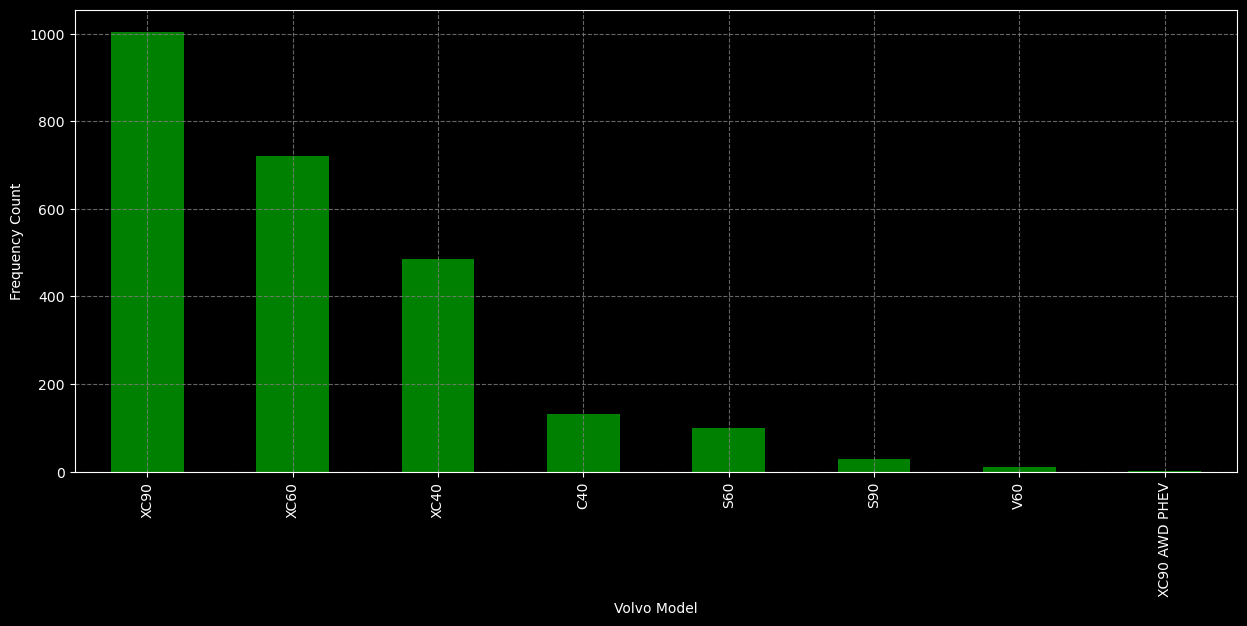

In [129]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
volvo.model.value_counts().plot.bar(color="green")
plt.grid(linestyle='--', color='gray', alpha=0.8)
plt.xlabel("Volvo Model")
plt.ylabel("Frequency Count")
plt.show()

#### 19. TOP TEN  ELECTRIC MODEL

In [140]:
top_5_model = df.model.value_counts().head(10)
top_5_model

MODEL 3        21715
MODEL Y        14468
LEAF           12916
MODEL S         7198
VOLT            4938
BOLT EV         4675
MODEL X         3945
NIRO            3318
PRIUS PRIME     2346
I3              1911
Name: model, dtype: int64

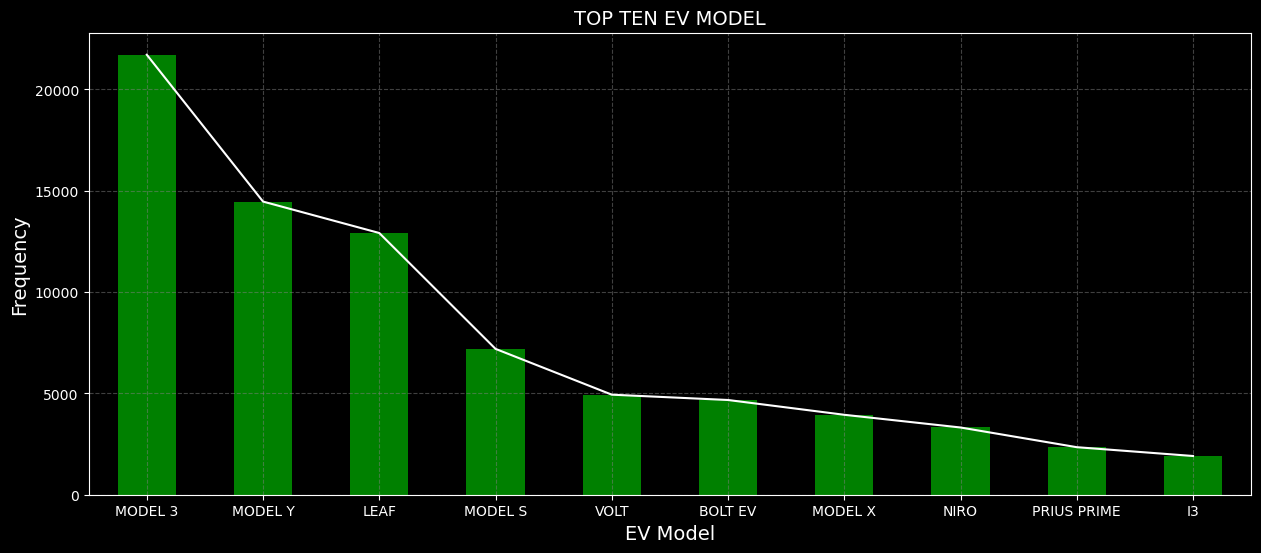

In [158]:
top_5_model = df.model.value_counts().head(10)
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
top_5_model.plot.bar(color="green")
top_5_model.plot(color="white")
plt.xlabel("EV Model",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("TOP TEN EV MODEL",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)

1. Model 3 and Model y are top sellin electric cars
2. Nissam Leaf is the third most selling electric car
3. Third Most selling car is Tesla Model S
4. Chevrolet Volt is the fifth most selling electric car
5. Chevrolet Bolt Ev is the six most selling electric car
6. Tesla Model X is the seventh most selling electric car
7. Kia Niro is the eight most selling electric car 
8. Toyota Prius prime is the nine most selling electric car
9. BMW I3 is the tenth most selling electric car

#### 19. ELECTRIC CAR SELLING CHART

In [142]:
df.model_year.value_counts().sort_index()

1993        1
1997        1
1998        1
1999        3
2000       10
2002        2
2008       26
2010       26
2011      849
2012     1713
2013     4741
2014     3697
2015     5003
2016     6273
2017     9740
2018    14325
2019    10593
2020    11018
2021    19381
2022    21414
2023      206
Name: model_year, dtype: int64

In [143]:
df_1993 = df[df["model_year"]==1993]
df_1993

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
79017,Thurston,Tumwater,WA,98501,1993,DODGE,CARAVAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,80,0,22.0,474727697,53067010802


In [144]:
df_1997 = df[df["model_year"]==1997]
df_1997

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
38174,Snohomish,Marysville,WA,98270,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,39,0,38.0,216755437,53061052805


The Chevrolet S-10 Electric was an American electric-powered vehicle built by Chevrolet. It was introduced in 1997, becoming the world's first electric pickup truck from the original manufacturer,[1] updated in 1998, and then discontinued. It was an OEM BEV variant of Chevrolet's S-10 pickup truck. The S-10 Electric was solely powered by electricity (batteries) and was marketed primarily to utility fleet customers.

In [145]:
df_1998 = df[df["model_year"]==1998]
df_1999 = df[df["model_year"]==1999]
df_2000 = df[df["model_year"]==2000]

In [146]:
df_1998

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
55400,Clallam,Sequim,WA,98382,1998,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,24.0,114654081,53009002301


In [147]:
df_1999

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
33359,King,Redmond,WA,98052,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,48.0,229373350,53033032324
47058,Pierce,Graham,WA,98338,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,2.0,215121742,53053073116
94416,Skagit,Mount Vernon,WA,98274,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,10.0,155686436,53057952700


In [148]:
df_2000

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
9839,King,Shoreline,WA,98133,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,32.0,205243356,53033020900
11713,Whatcom,Everson,WA,98247,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,42.0,122864766,53073010201
20048,San Juan,Friday Harbor,WA,98250,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,40.0,221693048,53055960400
46923,King,Seattle,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,142611402,53033001500
56088,King,Shoreline,WA,98133,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,32.0,9440952,53033020302
58982,Snohomish,Edmonds,WA,98026,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,32.0,166281790,53061050700
65709,King,Seattle,WA,98136,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,34.0,285175978,53033010602
79729,San Juan,Waldron,WA,98297,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,40.0,8166497,53055960103
83674,Whatcom,Everson,WA,98247,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,42.0,8650316,53073010201
95358,Clark,Vancouver,WA,98686,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,17.0,199684544,53011040812


The Ford Ranger EV (Electric Vehicle) is a battery powered compact pickup truck that was produced by the Ford motor company and was Ford's first all-electric production vehicle. It was produced starting in the 1998 model year through 2002 and is no longer in production.

In [149]:
df_2002 = df[df["model_year"]==2002]
df_2002

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
9529,Clallam,Sequim,WA,98382,2002,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,95,0,24.0,5993977,53009002302
87592,King,Sammamish,WA,98075,2002,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,95,0,41.0,175935672,53033032207


The Toyota RAV4 EV is an all-electric version of the popular RAV4 SUV produced by Toyota until 2014. Two generations of the EV model were sold in California, and to fleets elsewhere in the US.

In [150]:
df_2008 = df[df["model_year"]==2008]
df_2008.shape

(26, 14)

In [151]:
df_2008[:5]

,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
3518,King,Issaquah,WA,98029,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,5.0,206424627,53033032221
8037,King,Kirkland,WA,98033,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,45.0,146370661,53033022401
9146,San Juan,Friday Harbor,WA,98250,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,40.0,132987529,53055960302
13160,King,Redmond,WA,98052,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,48.0,189302445,53033022902
17412,Snohomish,Brier,WA,98036,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,1.0,160902584,53061051913


The Tesla Roadster is a battery electric vehicle (BEV) sports car, based on the Lotus Elise chassis, that was produced by the electric car firm Tesla Motors (now Tesla, Inc.) in California from 2008 to 2012. The Roadster was the first highway legal serial production all-electric car to use lithium-ion battery cells and the first production all-electric car to travel more than 320 kilometres (200 mi) per charge.

#### 20. TOTAL EV CAR SOLD ON UNITED STATE

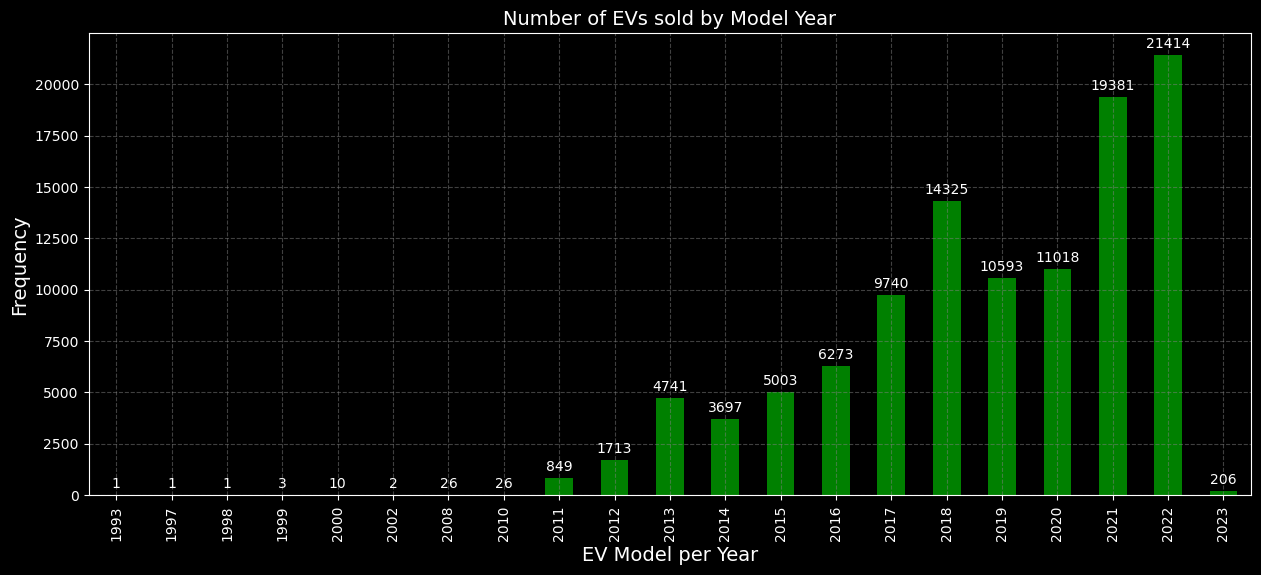

In [159]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = df.model_year.value_counts().sort_index().plot.bar(color="green")

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel("EV Model per Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Number of EVs sold by Model Year",fontsize=14)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

In 2022, EV sold were around 21,414 on records. it is the massive transition of car sold in United State.

In [160]:
print("Total car sold in United State:", sum(df.model_year.value_counts().sort_index()))

Total car sold in United State: 109023
